>## **비지도학습 Quiz 1** 
>
>- Quiz 시간: 2025년 4월 15일 09:00~10:20분까지<br><br>
>
>- 파일이름 작성방법: 비지도학습(3학년)_Quiz1_학번_성명.ipynb<br>
>
>- 주의사항 1: jupyternotebook file로만 제출 받습니다<br>
>- 주의사항 2: jupyternotebook file을 실행해본 후 upload하세요<br><br>
>
>- 답안지 제출 
   www.webhard.co.kr<br>
   ID: lindsey<br>
   PW: start<br>
   답안제출 Folder: 올리기전용/1학기/비지도학습(3학년)/Quiz1 답안제출폴더"에 답안제출<br>
>- 빈칸에 프로그램을 작성한 후 실행결과를 제출
>
>- Quiz는 답안체출 기한 이후에 upload된 file은 인정하지 않습니다

**[문제 1] 다음과 같은 5개의 3차원 Data를 주어진 2차원 target_vector  $b = [1, 0, 0] $에 투영하는 code를 작성하고 <br> $\qquad \quad \ $ 투영된 Data를 출력하시오** <br><br>
$\qquad \qquad$ 5개의 벡터들: [3, 4, 0], [1, 0, 1], [0, 2, 0], [5, 5, 1], [2, -1, 1]

In [1]:
import numpy as np

# 타겟 벡터 b와 5개의 3차원 데이터 벡터 정의
b = np.array([1, 0, 0]) # 3차원 내 점
data = np.array([
    [3, 4, 0],
    [1, 0, 1],
    [0, 2, 0],
    [5, 5, 1],
    [2, -1, 1]
])

# 벡터 b의 제곱 노름 (b·b)
b_norm_sq = np.dot(b, b)

# 각 벡터에 대해 투영 계산: proj = (a·b / (b·b)) * b
projections = np.array([np.dot(vec, b) / b_norm_sq * b for vec in data])

print(f"b의 크기: {b_norm_sq}") # b_rorm_sq = 1
print(f"원본 데이터 벡터: \n{data}")
print(f"\n투영된 데이터 벡터 (b = [1,0,0]로 투영): \n{projections}")

b의 크기: 1
원본 데이터 벡터: 
[[ 3  4  0]
 [ 1  0  1]
 [ 0  2  0]
 [ 5  5  1]
 [ 2 -1  1]]

투영된 데이터 벡터 (b = [1,0,0]로 투영): 
[[3. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [5. 0. 0.]
 [2. 0. 0.]]


**[문제 2] 다음과 같은 4차원 iris dataset이 있다** <br>
- PCA를 이용하여 2차원으로 차원축소한 후 $X$의 첫번째 data를 차원축소한 결과를 출력하시오

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 재현성 확보를 위한 시드 설정
import random
import os

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = '42'

In [3]:
iris = datasets.load_iris()

X = iris["data"]
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [4]:
pca = PCA(n_components=2) # 4차원 데이터를 2차원으로 축소
X_pca = pca.fit_transform(X)

print(f"첫번째 데이터의 차원 축소 결과: {X_pca[0]}")

첫번째 데이터의 차원 축소 결과: [-2.68412563  0.31939725]


**[문제 3] 문제 2에서 2차원으로 차원축소한 data들을 2차원 평면에 그리시오**

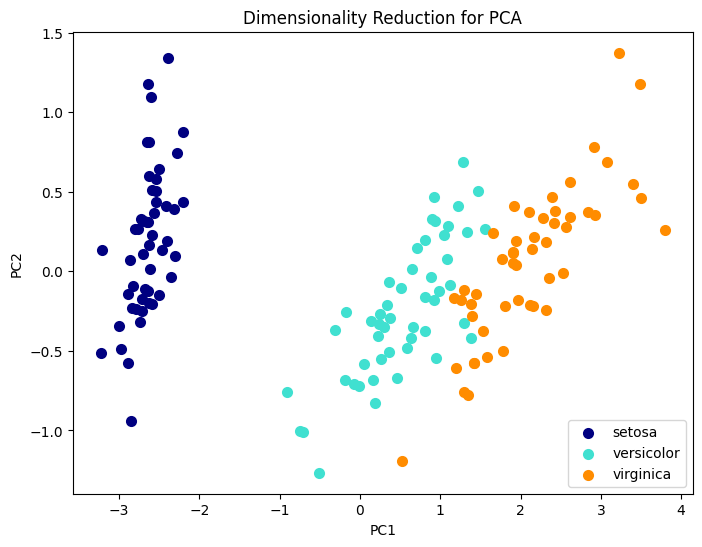

In [5]:
y = iris["target"]

target_names = iris["target_names"]  # 각 클래스의 이름 명시
colors = ['navy', 'turquoise', 'darkorange'] # 각 클래스에 대해 다른 색상과 레이블을 지정

plt.figure(figsize=(8, 6))
for color, label, target_name in zip(colors, np.unique(y), target_names):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1],
                color=color, lw=2, label=target_name)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Dimensionality Reduction for PCA")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

**[문제 4] 문제 2의 dataset을  다음과 같은 Autoencoder를 이용하여 차원축소를 하려고 한다** <br>

- 다음고 같은 Architecture를 가지는 Autoencoder를 이용하여 2차원으로 차원축소한  data들을 2차원 평면에 그리시오<br>
(1) Dataset: iris <br>
(2) Encoder: 4 $\rightarrow$ 2 <br>
(3) Decoder: 2 $\rightarrow$ 4 <br>
(4) Activation function: ReLU

In [6]:
# Autoencoder 구성
input_layer = Input(shape=(4,)) # 4차원 데이터
encoded = Dense(2, activation='relu')(input_layer) # Encoder 4->2
decoded = Dense(4, activation='relu')(encoded) # Decoder 2->4

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 학습
autoencoder.fit(X, X, epochs=100, batch_size=16, shuffle=True, verbose=1)

# 학습된 인코더를 추출하여 2차원 latent representation을 계산
encoder = Model(input_layer, encoded)
X_encoded = encoder.predict(X)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3759  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0088 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7273 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5293 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4018 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3249 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2795 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2508 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2298 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2120 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1954 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1794 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1636 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1479 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

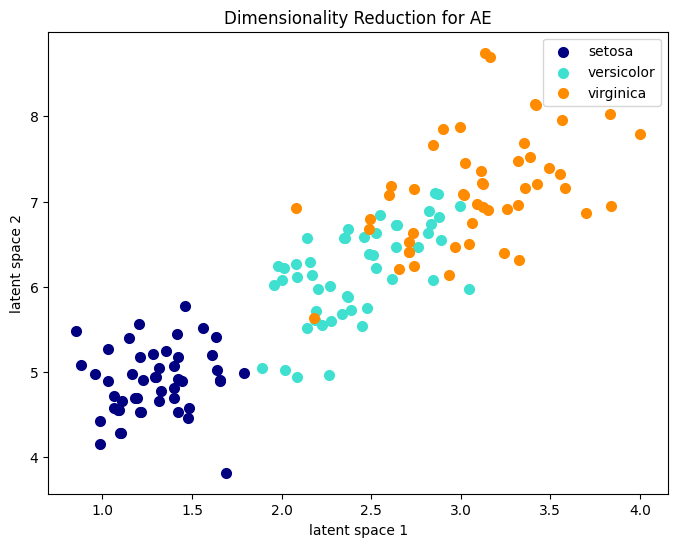

In [7]:
# 2차원 평면에 latent representation을 각 클래스별로 시각화
plt.figure(figsize=(8, 6))
for color, label, target_name in zip(colors, np.unique(y), target_names):
    plt.scatter(X_encoded[y == label, 0], X_encoded[y == label, 1],
                color=color, lw=2, label=target_name)
plt.xlabel("latent space 1")
plt.ylabel("latent space 2")
plt.title("Dimensionality Reduction for AE")
plt.legend(loc="best")
plt.show()

**[문제 5] 문제 3의 결과와 문제 4의 결과의 차이가 존재하는 이유는 무엇인지 간단히 서술하시오**

### PCA
- 선형차원축소 방법.
- 데이터의 공분산 행렬을 기반으로 분산이 큰 축을 결정해 투영.
- 결정적이고 고정된 선형 투영을 제공.
### Autoencoder
- 비선형차원축소 방법.
- 신경망을 통해 reconstruction loss를 최소화하는 방향으로 데이터를 압축해 잠재 공간을 학습함.
- 모델 구조, 학습 과정, 초기화 등에 따라 다른 비선형 매핑을 학습하게 되어 결과 분포가 다르게 나타날 수 있음.